# 1 - Import Libraries

In [47]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visualization
from matplotlib.pyplot import xticks
%matplotlib inline

# # Data display options
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns',100)


# 2- Explore Database 

## 2.1 - Data Loading

In [48]:
#importing the dataset
leads =pd.read_csv(r'C:\Users\Ana\OneDrive\Documents\Ironhack\Week 9\Final Project\Lead Score\Dataset\Leads.csv')
leads.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [49]:
#checking for duplicate values
sum(leads.duplicated(subset='Prospect ID')) ==0 #no duplicates found

True

The output "True", means there are no duplicate values in the 'Prospect ID' column of the dataset. This is a good indication that the dataset is clean in terms of unique identifiers for each lead, making it easier to perform analyses without worrying about duplicated data.

## 2.2 - Leads Inspection

In [50]:
leads.shape
print("Number of rows: {}".format(leads.shape[0]))
print("Number of columns: {}".format(leads.shape[1]))

Number of rows: 9240
Number of columns: 37


Dimensions of the dataset:

<b>Number of rows:</b> 9240 - This tells us that there are 9240 leads in the dataset. </br>
<b>Number of columns:</b>  37 - This informs that there are 37 columns available for each lead in the dataset.

In [51]:
# summary of the dataset
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [52]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


 The `describe` method is used here to generate descriptive statistics of the dataset. 
 This method provides a summary of the central tendency, dispersion, and shape of the 
 distribution of the dataset, excluding "NaN" values. This will help me to understand 
 the general properties of the numerical columns in the dataset, like mean, standard deviation, 
 minimum, and maximum values, etc. 


 Observing the descriptive statistics of the dataset, I notice the following:</br>

 1. "Lead Number": This column seems to be an identifier with values ranging from 579533 to 660737. </br>
   Since it's an identifier, the descriptive statistics may not be very meaningful here.</br>

 2. "Converted": This is a binary column with values 0 or 1. The mean value is approximately 0.385, 
   indicating that about 38.5% of the leads were successfully converted.</br>

 3. "TotalVisits": The average number of total visits is around 3.44 with a standard deviation of 
    about 4.85, indicating a wide spread of data. The maximum value is 251, which seems quite high </br>
    and might be an outlier.</br>

 4. "Total Time Spent on Website": The average time spent on the website is about 487.7 minutes. </br>
   The distribution seems to be right-skewed as the mean is higher than the median (248 minutes).</br>

 5. "Page Views Per Visit": The average number of page views per visit is about 2.36. However,
    the maximum value is 55, which seems to be an outlier and might require further investigation.</br>

 6. "Asymmetrique Activity Score" and "Asymmetrique Profile Score": These columns contain scores
    with mean values of approximately 14.31 and 16.34, respectively. It seems like the data in </br>
    these columns are fairly normally distributed.</br>

## 2.3 - Data Cleaning 

### 2.3.1 - Missing Values

In [53]:
#calculate the number of missing values in each column of the dataset
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [54]:
# Convert "Select" values to NaN
leads=leads.replace("Select", np.nan)
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Observations:
After replacing the "Select" values with NaN, it seems that the number of missing values in some columns has increased significantly. This is particularly noticeable in the columns:

<b>Specialization</b>: Increased from 1438 to 3380 </br>
<b>How did you hear about X Education</b>: Increased from 2207 to 7250</br>
<b>Lead Profile</b>: Increased from 2709 to 6855</br>
<b>City</b>: Increased from 1420 to 3669</br>
It seems that the "Select" option was being used as a placeholder for missing data in these columns. By replacing these values with NaN, we now have a more accurate representation of the missing data in the dataset.

In [55]:
#compute the percentage of missing values in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)


How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

Observations:</br>
This output gives me a clearer view of the extent of missing data in each column, expressed as a percentage of the total number of entries.</br>
The columns <b>"How did you hear about X Education"</b> and <b>"Lead Profile"</b> have the highest percentage of missing values, exceeding 74%.</br>
These columns might not provide much information due to the high percentage of missing values, and I might consider dropping them during data cleaning.</br>
Other columns like <b>"Lead Quality"</b>, <b>"Asymmetrique Profile Score"</b>, <b>"Asymmetrique Activity Score"</b>, <b>"City"</b>, and <b>"Specialization"</b> also have a significant percentage of missing values.</br>
A few columns have a small percentage of missing values (< 2%), which might be easier to handle through imputation or removal of the corresponding rows.</br>
Several columns have no missing values, which is excellent as it makes them straightforward to analyze.

In [56]:
# now i will drop the columns which have more than 40% missing values
def dropNullColumns(data, percentage=40):
    
    missing_perc = 100*(leads.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",leads.shape)
    
    leads.drop(labels=col_to_drop,axis=1, inplace=True)
    
    print("Shape after dropping columns: ",leads.shape)

In [57]:
dropNullColumns(leads)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


Observations:</br>
The dropNullColumns function successfully identified and dropped columns with more than 40% missing values from the dataset.</br>

The dataset had an initial shape of <b>(9240, 37)</b>, representing 9240 rows and 37 columns.</br>
After dropping the columns with more than 40% missing values, the dataset now has a shape of <b>(9240, 30)</b>, retaining 9240 rows but reduced to 30 columns.</br>
This reduction in the number of columns makes the dataset more manageable and focuses the analysis on the columns with substantial data.</br>

In [58]:
# Calculate the percentage of missing values in each column of the updated dataset (after dropping columns with more than 40% missing values) 
# and then sorts the columns in descending order of the percentage of missing values.
100*(leads.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

### 2.3.2 - Missing Values in Categorical Columns 

#### "City" column

In [59]:
#display the unique values present in the "City" column of the dataset. 
leads["City"].unique()

array([nan, 'Mumbai', 'Thane & Outskirts', 'Other Metro Cities',
       'Other Cities', 'Other Cities of Maharashtra', 'Tier II Cities'],
      dtype=object)

In [60]:
leads["City"].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

The descriptive statistics for the "City" column provide the following insights:</br>
<b>Count</b>: There are 5571 non-null (non-missing) entries in the "City" column. </br>
This means there are a significant number of missing values, which aligns with the previous analysis where we observed a high percentage of missing values in this column.</br>
<b>Unique</b>: There are 6 unique categories of cities represented in this column, providing a good variety of categories for analysis.</br>
<b>Top</b>: The most frequently occurring category is "Mumbai", indicating that a substantial portion of the leads are from Mumbai.</br>
<b>Freq</b>: The frequency of the top category ("Mumbai") is 3222, which means that Mumbai appears 3222 times in the "City" column, making it a dominant category in the dataset.

In [61]:
#Calculate the number of missing values in the "City" column
leads["City"].isnull().sum()

3669

In [62]:
# Grouping the specified city names into "Other_city_india"
cities_to_group = ["Thane & Outskirts", "Other Cities of Maharashtra", "Other Metro Cities", "Tier II Cities"]
leads['City'] = leads['City'].apply(lambda x: "Other_city_india" if x in cities_to_group else x)

# Displaying the transformed data
leads["City"].value_counts()

City
Mumbai              3222
Other_city_india    1663
Other Cities         686
Name: count, dtype: int64

#### "Specialization" Column

<b>Specialization:</b> Specialization has 36.58 % missing values.</br>
 The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. </br>
 I need to create additional category called `'Others'`. 


In [63]:
# value counts for each unique entry in the "Specialization" column
leads.Specialization.value_counts()

Specialization
Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: count, dtype: int64

In [64]:
# Calculating descriptive statistics --> insights such as the number of unique values, the top (most frequent) value, and the frequency of the top value.
leads.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

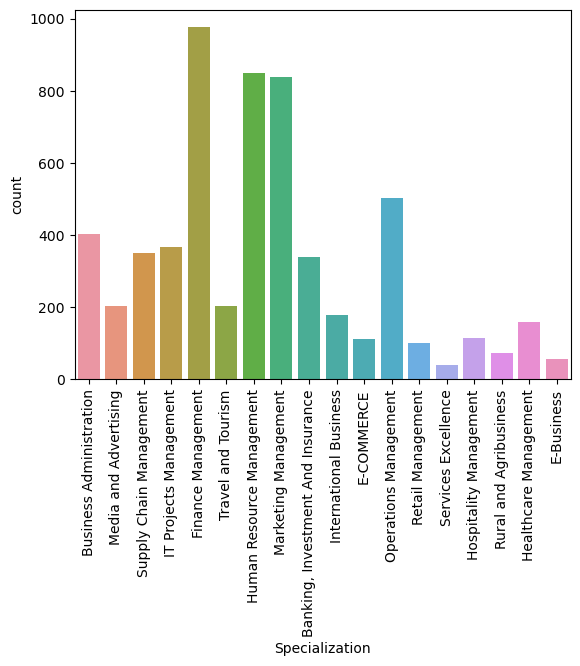

In [65]:
sns.countplot(data=leads, x="Specialization")
plt.xticks(rotation=90)
plt.show()

Observations:
As observed in the value counts, the specialization in <b>"Finance Management"</b> has the highest count. </br>
This is followed by specializations in <b>"Human Resource Management"</b> and <b>"Marketing Management"</b>.</br>
Some specializations such as <b>"Services Excellence"</b>, <b>"E-Business"</b>, and <b>"Rural and Agribusiness"</b> have a relatively lower count.</br>


In [66]:
# Replacing the missing values in the "Specialization" column with a new category called "Others". 
# This is a strategy to handle missing values by imputing them with a placeholder value.
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')
transformed_specialization_value_counts = leads['Specialization'].value_counts()
transformed_specialization_value_counts

Specialization
Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

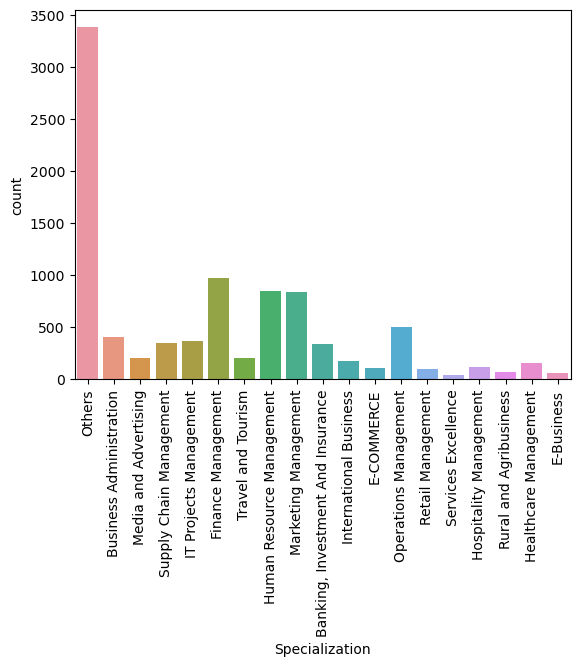

In [67]:
sns.countplot(data=leads, x="Specialization")
plt.xticks(rotation=90)
plt.show()

In [68]:
#Calculate the percentage of missing values in each column of the dataset and rounds the values to two decimal places
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)

City                                             39.71
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Receive More Updates About Our Courses            0.00
Prospect ID                                       0.00
Newspaper                                         0.00
Update me on Supply Chain Content                 0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Digital Advertisement                             0.00
Search    

#### "Tags" Column

In [69]:
#Calculate descriptive statistics for the "Tags" column
leads.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [70]:
leads.Tags.value_counts()

Tags
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to O

In [71]:
#Calculate the percentage of missing values in the "Tags" column
print(round(100*(leads["Tags"].isnull().sum()/len(leads.index)), 2), "%")


36.29 %


<strong>Tags:</strong> Tags has 36.29 % missing values. Tags are assigned to customers indicating the current status of the lead. Since this is current status, this column will not be useful for modeling. Hence it can be dropped.

In [72]:
# This column has almost 37% null values and its assign by the employee so we can drop this column
leads= leads.drop(['Tags'], axis=1)

The decision to drop this column was made due to the high percentage of missing values (approximately 36.29%), coupled with the fact that the tags are assigned by employees, potentially introducing subjectivity into the data. </br>
With the removal of the "Tags" column, the dataset now has one less feature to consider during the analysis and modeling process.</br>
This might simplify the data preprocessing steps but also removes a potentially informative feature.

#### "What matters most to you in choosing a course" Column

In [73]:
# Calculate descriptive statistics for the "What matters most to you in choosing a course" column
leads["What matters most to you in choosing a course"].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [74]:
# Calculate the value counts for each unique entry in the "What matters most to you in choosing a course" column
leads["What matters most to you in choosing a course"].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

<strong>What matters most to you in choosing a course:</strong> This variable has 29.32 % missing values. 99.95% customers have selected 'better career prospects'. This is massively skewed and will not provide any insight.

In [75]:
# drop ['What matters most to you in choosing a course'] column
leads= leads.drop(['What matters most to you in choosing a course'], axis=1)

#### "What is your current occupation" Column

In [76]:
#check the occupation column
leads["What is your current occupation"].value_counts()

What is your current occupation
Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

A significant majority of the leads are categorized as "Unemployed", followed by "Working Professional" and "Student". </br>

These three categories represent the main groups of leads based on their current occupation.</br>

The categories "Other", "Housewife", and "Businessman" have fewer entries, indicating that these occupations are less common among the leads.</br>

The column likely contains missing values, given the substantial number of leads and the relatively small total count of the non-null values in these categories.</br>



In [77]:
#check sum null values in occupation column 
print(round(leads["What is your current occupation"].isnull().sum()/len(leads.index), 2), "%")

0.29 %


In [78]:
#check the describe for this column
leads["What is your current occupation"].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

<strong>What is your current occupation:</strong> We can impute the missing values with `'Unemployed'` as it has the most values. This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed. 

In [79]:
#lets input the null values with "Unemployed"
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

#### "Country" Columns

In [80]:
#check column country
leads["Country"].value_counts()

Country
India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

A vast majority of the leads are from India, accounting for 6492 out of the total non-null entries. This indicates that the dataset primarily consists of leads from India. </br>

Other countries are represented in much smaller numbers, with the United States and the United Arab Emirates being the next most common countries but with significantly fewer leads compared to India.</br>

The column also contains an entry labeled "unknown", representing leads with unspecified or unknown countries.

In [81]:
# lets drop the country column  
leads= leads.drop(['Country'], axis=1)

#### "Last activity" Column

In [82]:
leads["Last Activity"].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

The majority of the last activities are categorized as "Email Opened" and "SMS Sent", suggesting that these are the primary channels of interaction with the leads. </br>

There are several categories with very few counts, which might require grouping into broader categories to avoid having too many sparse categories during the analysis.

In [83]:
# we will input the missing values in the "Last Activity" column with "Other"
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Others')

In [84]:
print("Now we have", leads['Last Activity'].isnull().sum(), "missing values")

Now we have 0 missing values


The missing values in the "Last Activity" column have been successfully imputed with the value "Others", as evidenced by a 0.0% missing value percentage after the imputation. </br>

This imputation strategy is aligned with the idea of grouping less frequent categories and missing values into a broader "Others" category, which can help in simplifying the analysis and modeling process.</br>

The "Others" category will now include the original missing values along with any other activities that might be grouped into this category during the data preprocessing steps.

#### "Lead Source" Column

In [85]:
#calculate the value counts for each unique entry in the "Lead Source" column
leads["Lead Source"].value_counts()

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

The majority of the leads were acquired through sources such as Google, Direct Traffic, and Olark Chat, which represent the primary channels of lead acquisition. </br>

There are several sources with very few counts (e.g., "bing", "Click2call", "Press_Release"), which might require grouping into broader categories or an "Others" category to prevent the creation of too many sparse categories during the analysis. </br>

It is also noticeable that there are some redundant categories (e.g., "Google" and "google") that might require merging to maintain consistency in the data.

In [86]:
# we will input the missing values in the "Lead Source" column with "google"
leads['Lead Source'] = leads['Lead Source'].replace(np.nan, 'google')

### 2.3.3 - Missing Values in Numerical columns

#### "Total Visits" Columns

In [87]:
# TotalVisits missing values to be imputed with mode
leads['TotalVisits'].fillna(leads['TotalVisits'].mode()[0], inplace=True)

The missing values in the "TotalVisits" column have been successfully imputed with the mode of the column, as indicated by a 0.0% missing value percentage after the imputation. </br>

This approach of using the mode for imputation is beneficial for columns with a well-defined peak in their distribution, helping maintain the distribution's characteristics even after the imputation.


#### "Page Views per visit" Column


In [88]:
# Page Views Per Visit missing values to be imputed with mode
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mode()[0], inplace=True)

The missing values in the "Page Views Per Visit" column have been successfully imputed with the mode of the column, as indicated by a 0.0% missing value percentage after the imputation. </br>

This step is in line with the approach of using statistical measures (like mode in this case) to impute missing values, which helps in maintaining the structure and characteristics of the data distribution.

### 2.3.4 Columns with only 1 value

In [89]:
#lets see if there is any column with only one unique value
leads.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,5571,9240,9240,9240
unique,9240,5,21,2,2,18,19,6,2,1,2,2,2,2,2,1,1,1,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No,Modified
freq,1,4886,2868,8506,9238,3437,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,3222,9240,6352,3407


- 'I agree to pay the amount through cheque', 
- 'Get updates on DM Content', 
- 'Update me on Supply Chain Content', 
- 'Receive More Updates About Our Courses', 
- 'Magazine'

In [90]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
cols_to_drop = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",leads.shape)
leads.drop(cols_to_drop, axis = 1, inplace = True)
print("After Dropping Columns",leads.shape)

Before Dropping Columns (9240, 27)
After Dropping Columns (9240, 22)


### 2.3.5 - Columns that we dont need

- 'Prospect ID',
- 'Lead Number',
- 'Last Notable Activity' 

In [91]:
# Dropping Columns
print("Before Dropping Columns",leads.shape)
leads.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Dropping Columns",leads.shape)

Before Dropping Columns (9240, 22)
After Dropping Columns (9240, 19)


In [92]:
# Recheck the percentage of missing values
round(((leads.isnull().sum()/leads.shape[0])*100),2).sort_values(ascending=False)

City                                      39.71
Lead Origin                                0.00
What is your current occupation            0.00
Through Recommendations                    0.00
Digital Advertisement                      0.00
Newspaper                                  0.00
X Education Forums                         0.00
Newspaper Article                          0.00
Search                                     0.00
Specialization                             0.00
Lead Source                                0.00
Last Activity                              0.00
Page Views Per Visit                       0.00
Total Time Spent on Website                0.00
TotalVisits                                0.00
Converted                                  0.00
Do Not Call                                0.00
Do Not Email                               0.00
A free copy of Mastering The Interview     0.00
dtype: float64

## 2.4 -  Looking for skewness in categorical columns

In [93]:
# Dropping categorical columns with highly skewed data

print("Before Drop: ",leads.shape)
leads.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop: ",leads.shape)

Before Drop:  (9240, 19)
After Drop:  (9240, 12)


In [94]:
leads.columns.sort_values().to_list()

['A free copy of Mastering The Interview',
 'City',
 'Converted',
 'Do Not Email',
 'Last Activity',
 'Lead Origin',
 'Lead Source',
 'Page Views Per Visit',
 'Specialization',
 'Total Time Spent on Website',
 'TotalVisits',
 'What is your current occupation']

## 3 - Standardize values

#### 3.1- Numerical Values

In [95]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='blue')

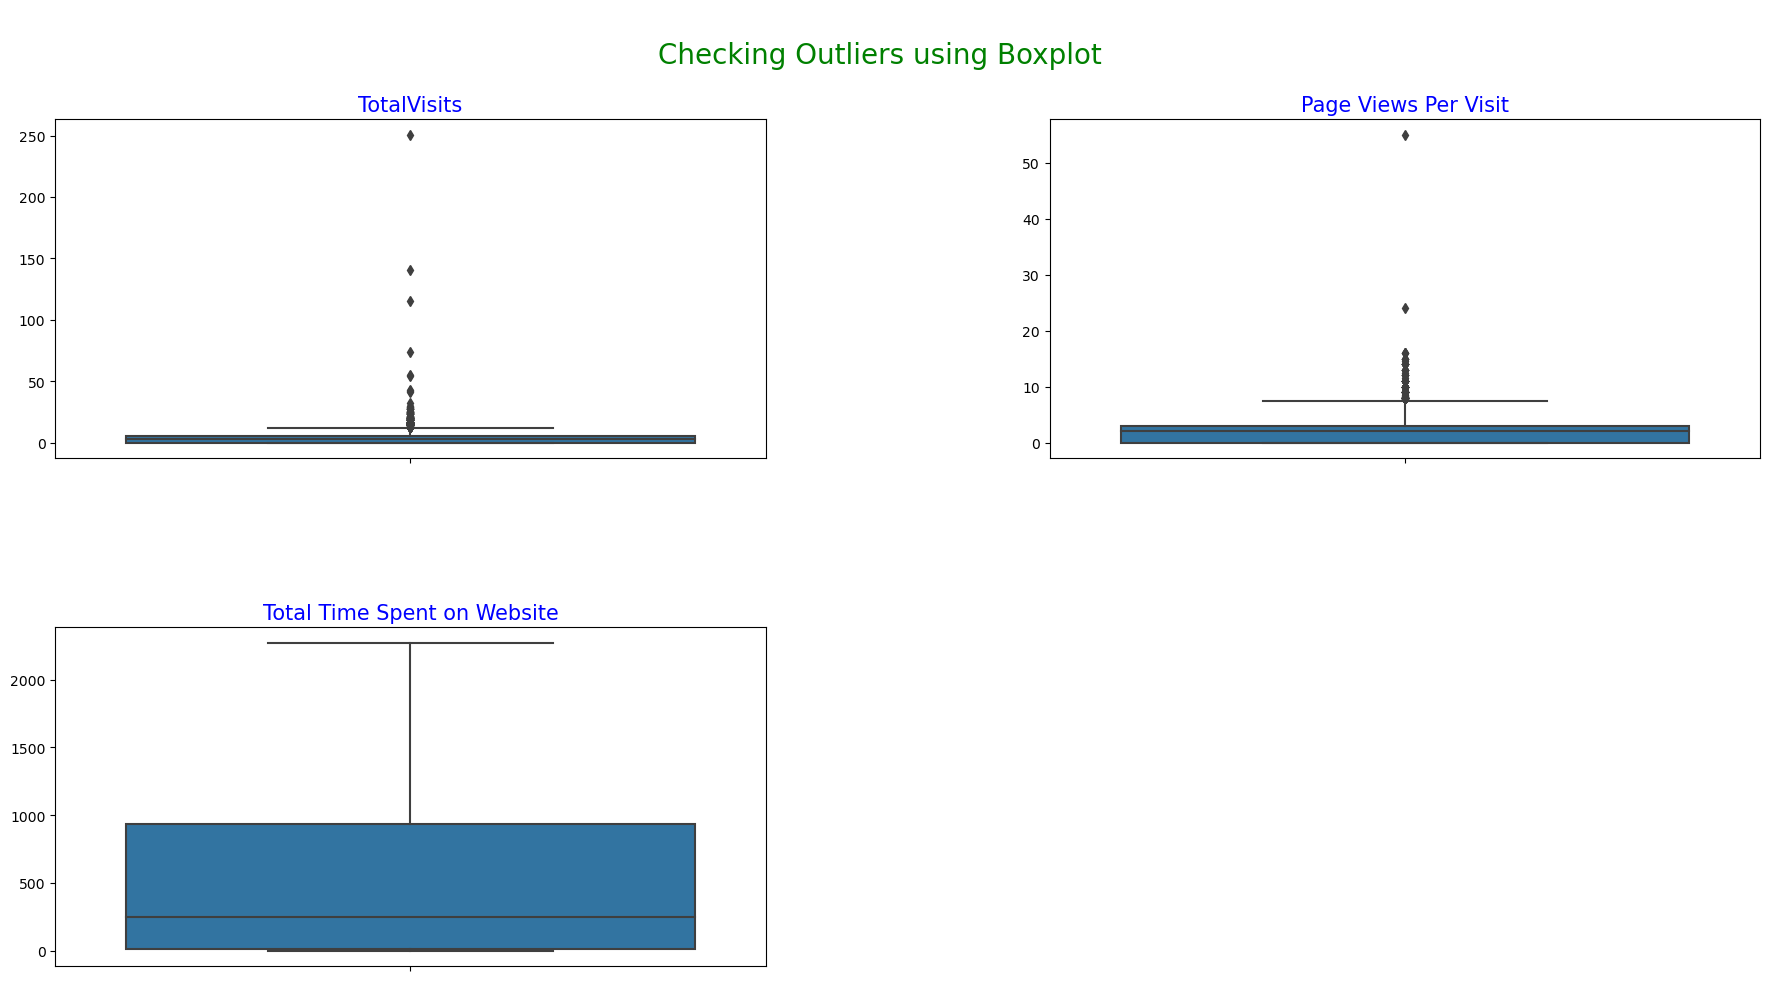

In [96]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(leads,num_cols)

"TotalVisits","Page Views Per Visit":Both these variables contain outliers as can be seen in the boxplot. </br>
So, These outliers needs to be treated for these variables

In [97]:
# before outlier treatment
leads.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [102]:
def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        

In [103]:
# Checking outliers for numerical variables other than target variable 
capping_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(leads,capping_cols)

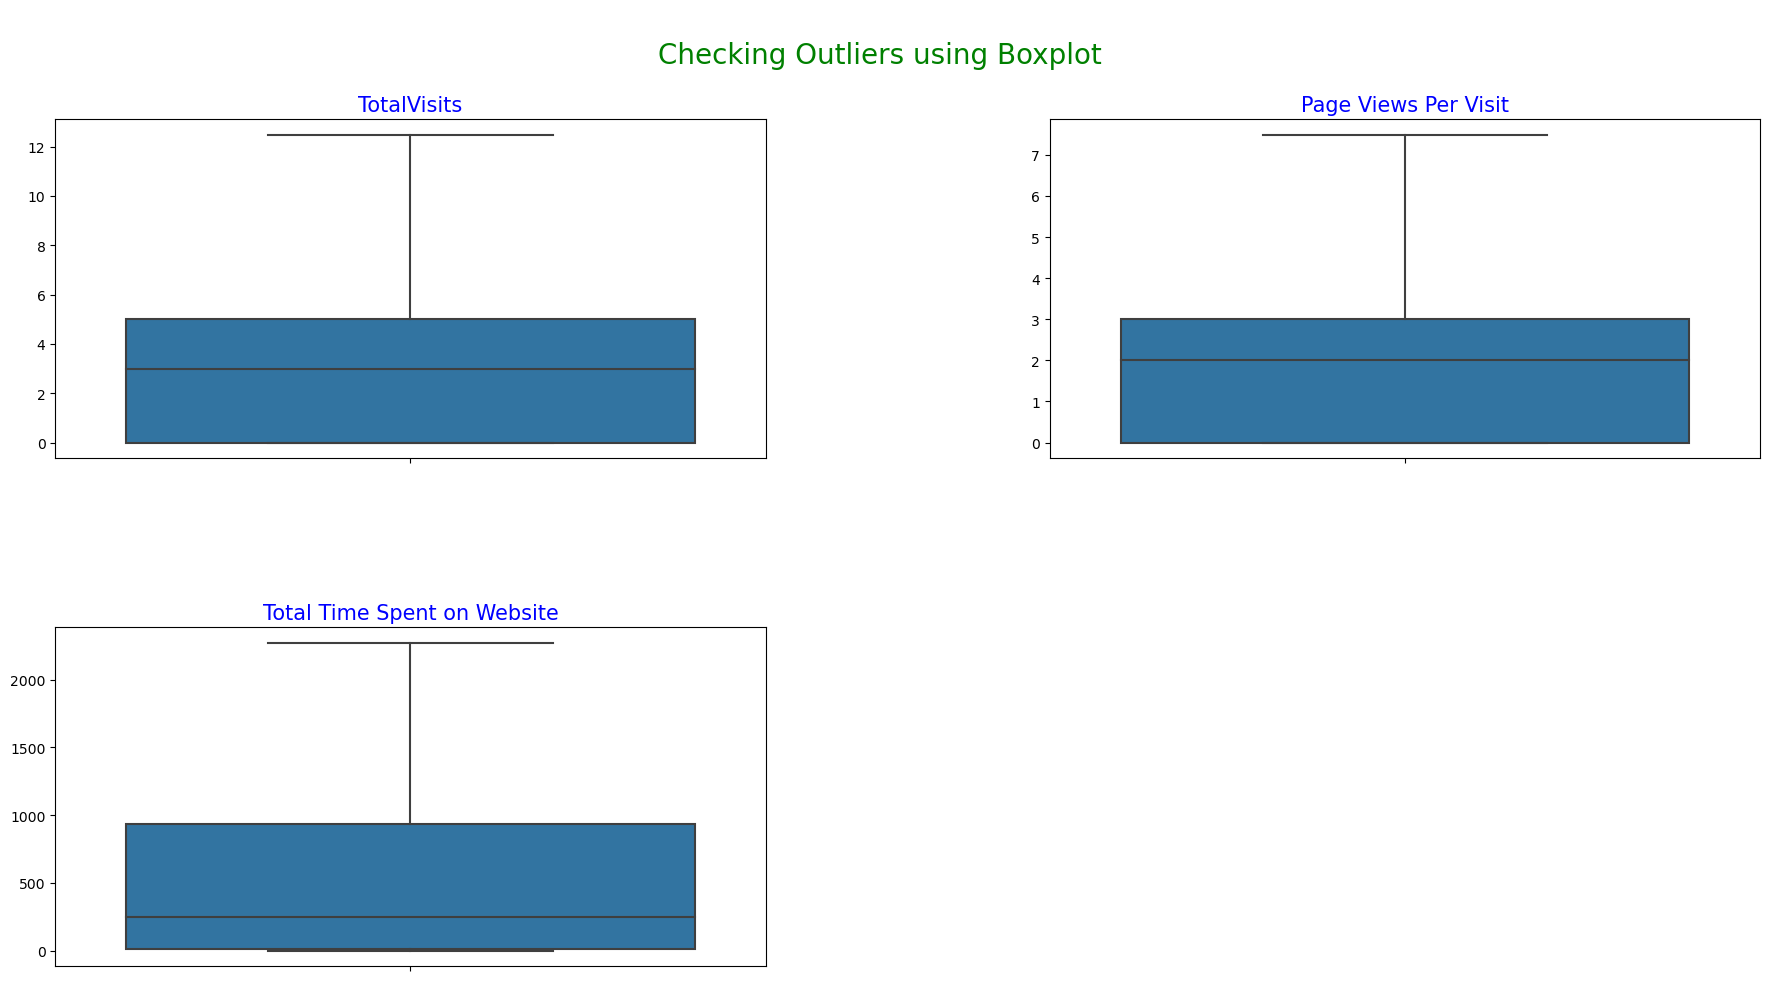

In [104]:
# Checking Boxplot after Outlier Treatment

num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(leads,num_cols)

#### 3.2 - Categorical Variables

In [106]:
## Categorical Variables 

columnsList_cat = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in columnsList_cat:
        perc=100*leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("__"*20,"\n")

value_counts % for : Lead Origin 

Lead Origin
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: proportion, dtype: float64 

________________________________________ 

value_counts % for : Lead Source 

Lead Source
Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
google                0.443723
bing                  0.064935
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0

Lead Origin: Most leads come from "Landing Page Submission" (52.88%) and "API" (38.74%), with a minor portion from "Lead Add Form" (7.77%).

Lead Source: Predominantly from "Google" (31.04%), "Direct Traffic" (27.52%), and "Olark Chat" (18.99%). Some minor categories could be grouped into "Others".

Do Not Email: Majority (92.06%) prefer not to block email communications, indicating the potential effectiveness of email marketing.

Last Activity: Mainly characterized by "Email Opened" (37.20%) and "SMS Sent" (29.71%). Few minor categories might be consolidated.

Specialization: A notable segment (24.89%) didn't specify their specialization, requiring further investigation. Otherwise, the distribution is balanced.

Current Occupation: Predominantly "Unemployed" (89.72%), followed by "Working Professionals" (7.64%) and "Students" (2.27%).

Free Copy of Mastering The Interview: 68.74% declined, while 31.26% accepted the offer.

In [112]:
# Grouping low frequency value levels to Others
leads['Lead Source'] = leads['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")

# Changing google to Google
leads['Lead Source'] = leads['Lead Source'].replace("google","Google")

In [113]:
# value_counts percentage after replace
leads["Lead Source"].value_counts(normalize=True)*100

Lead Source
Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: proportion, dtype: float64

In [114]:
# Grouping low frequency value levels to Others 
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [115]:
# value_counts percentage after replace
leads['Last Activity'].value_counts(normalize=True)*100

Last Activity
Email Opened                 37.196970
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Others                        3.333333
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Name: proportion, dtype: float64

In [116]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
leads.rename(columns={'A free copy of Mastering The Interview': 'Free_copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupationA free copy of Mastering The Interview"
leads.rename(columns={'What is your current occupation': 'Current_occupation'}, inplace=True)

#### 3.3- Binary Categorical Columns

In [117]:
# Mapping binary categorical variables (Yes/No to 1/0) 
leads['Do Not Email'] = leads['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)
leads['Free_copy'] = leads['Free_copy'].apply(lambda x: 1 if x =='Yes' else 0)

In [118]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   Current_occupation           9240 non-null   object 
 10  City                         5571 non-null   object 
 11  Free_copy                    9240 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 866.4+ KB


## 4- Data Analysis (EDA)

#### 4.1 - Imbalanced

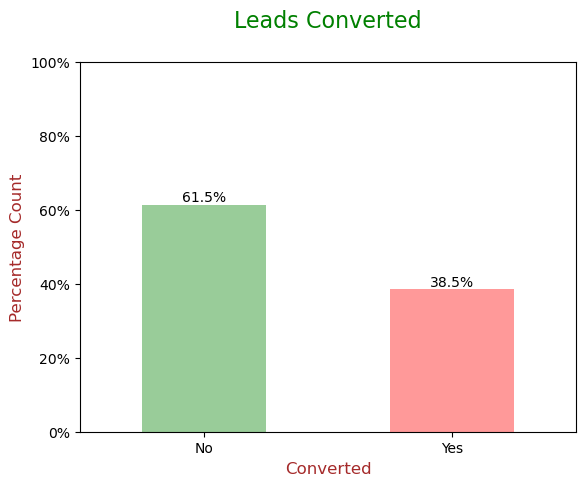

In [119]:
## ploting the results on bar plot

ax=(100*leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Green","Red"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

#xticks
plt.xticks([0,1],["No","Yes"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

<strong><span>Insights:</span></strong> 
- **Conversion rate is of 38.5%**, meaning only 38.5% of the people have converted to leads.(Minority)
- While 61.5% of the people didnt convert to leads. (Majority)

#### 4.2 - Univariate Analysis for Categorical Variables

In [120]:
#List of categorical columns
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Free_copy","Lead Source","Last Activity","Specialization"]

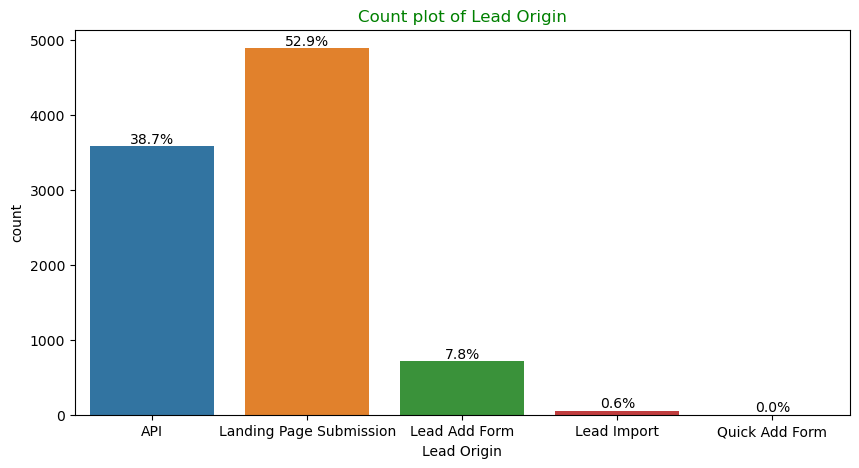

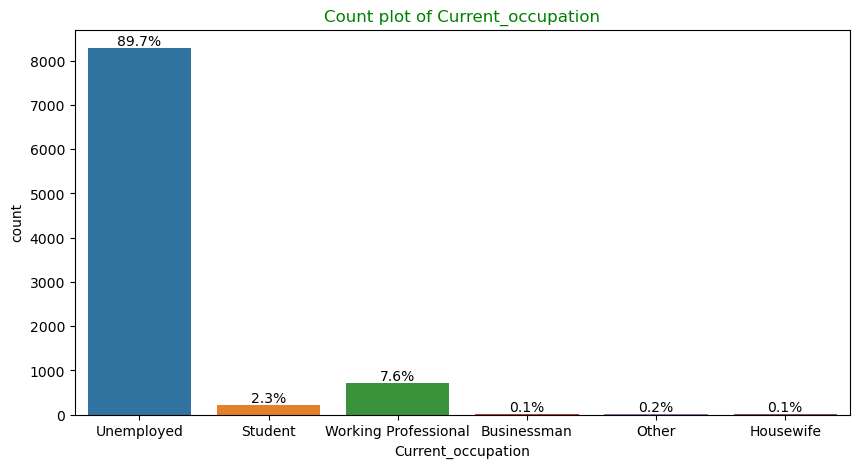

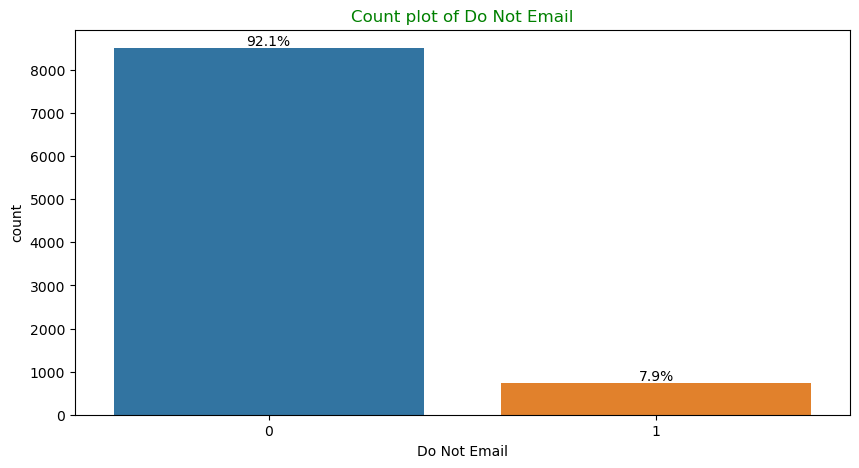

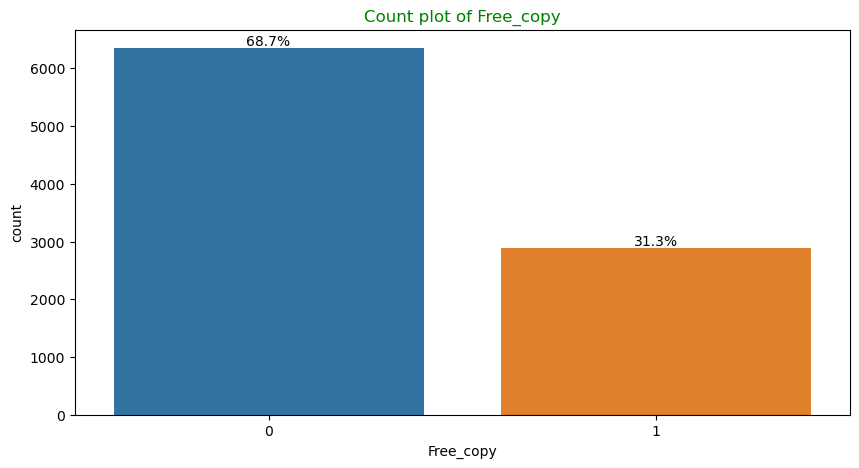

In [121]:
# countplot of columns with its value_counts percentage as annotation
for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=leads)
    total=len(leads[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        

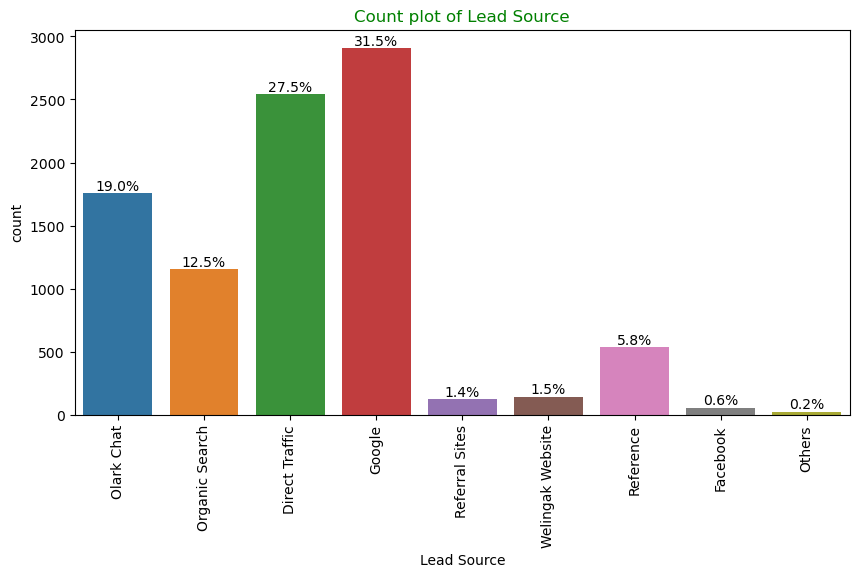

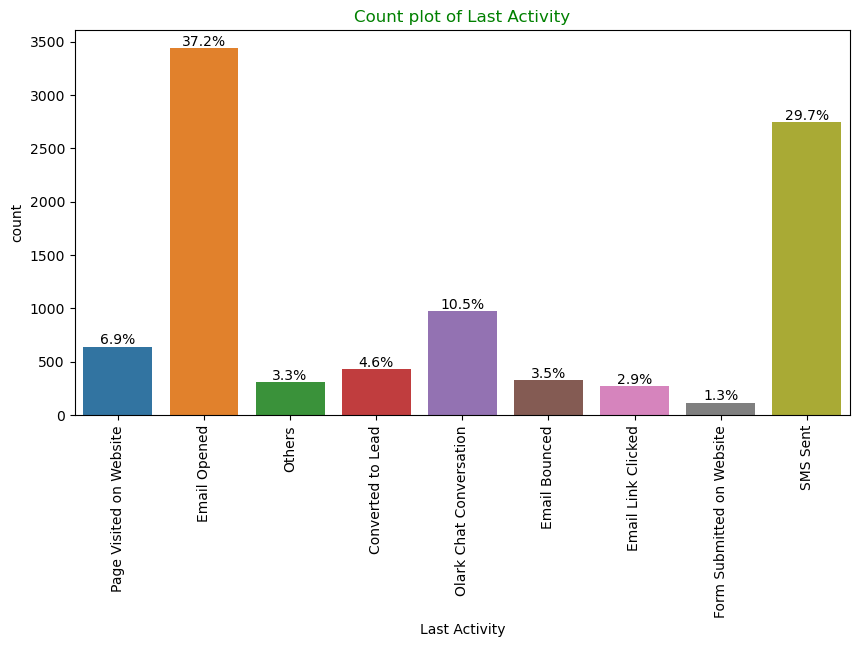

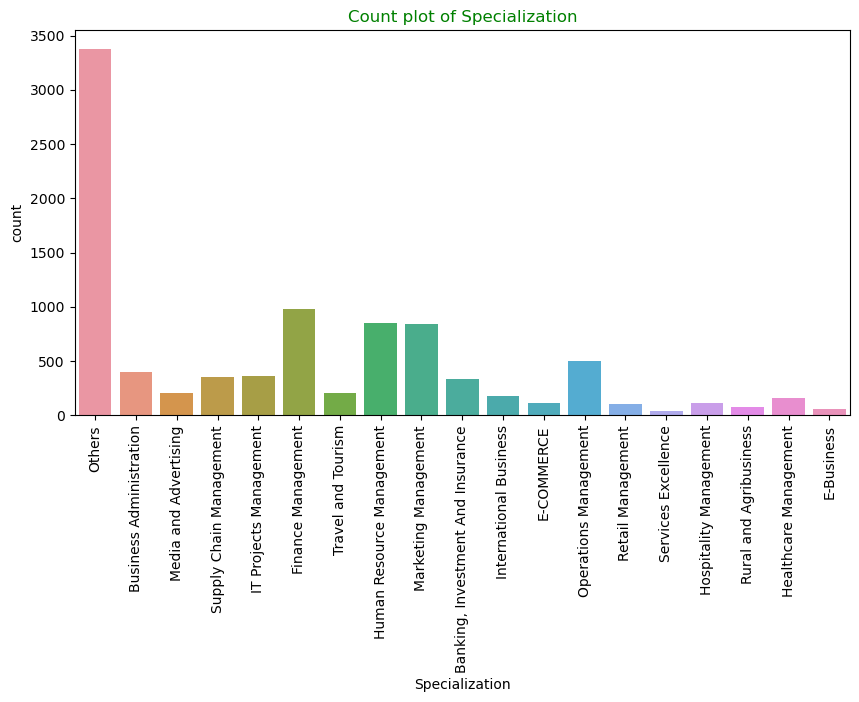

In [122]:
# Barplot for remaining columns from cat_cols (Did separate to rotate xticks 90* so labels doesnt become messy)
for i in cat_cols[4:]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=leads)
    total=len(leads[i])
    plt.xticks(rotation=90)
    
    
    if i!="Specialization":        # (not doing for Specialization xtick labels will be messy)
        for p in ax.patches:
            text = '{:.1f}%'.format(100*p.get_height()/total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    else:
        pass

<strong><span>Observations:</span></strong> 

- In Categorical Univariate Analysis we get to know the value counts percentage in each variable that how much is the distribution of values in each column.

- With this we get some understanding that which variables can be used in **Bivariate analysis**.

<hr/>
<strong><span>Insights Univariate:</span></strong>  

**Here is the list of features from variables which are present in majority (Converted and Not Converted included)** 

- **Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%. 

- **Current_occupation:** It has 90% of the customers as Unemployed

- **Do Not Email:** 92% of the people has opted that they dont want to be emailed about the course.

- **Lead Source:** 58% Lead source is from Google & Direct Traffic combined

- **Last Activity:** 68% of customers contribution in SMS Sent & Email Opened activities

<strong><span>NOTE:</span></strong> These insights will be helpful in further Bivariate Analysis.

#### 4.3 -  Bivariate Analysis for Categorical Variables

In [123]:
def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=leads,palette="prism_r",alpha=0.46)
    
    total=len(leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


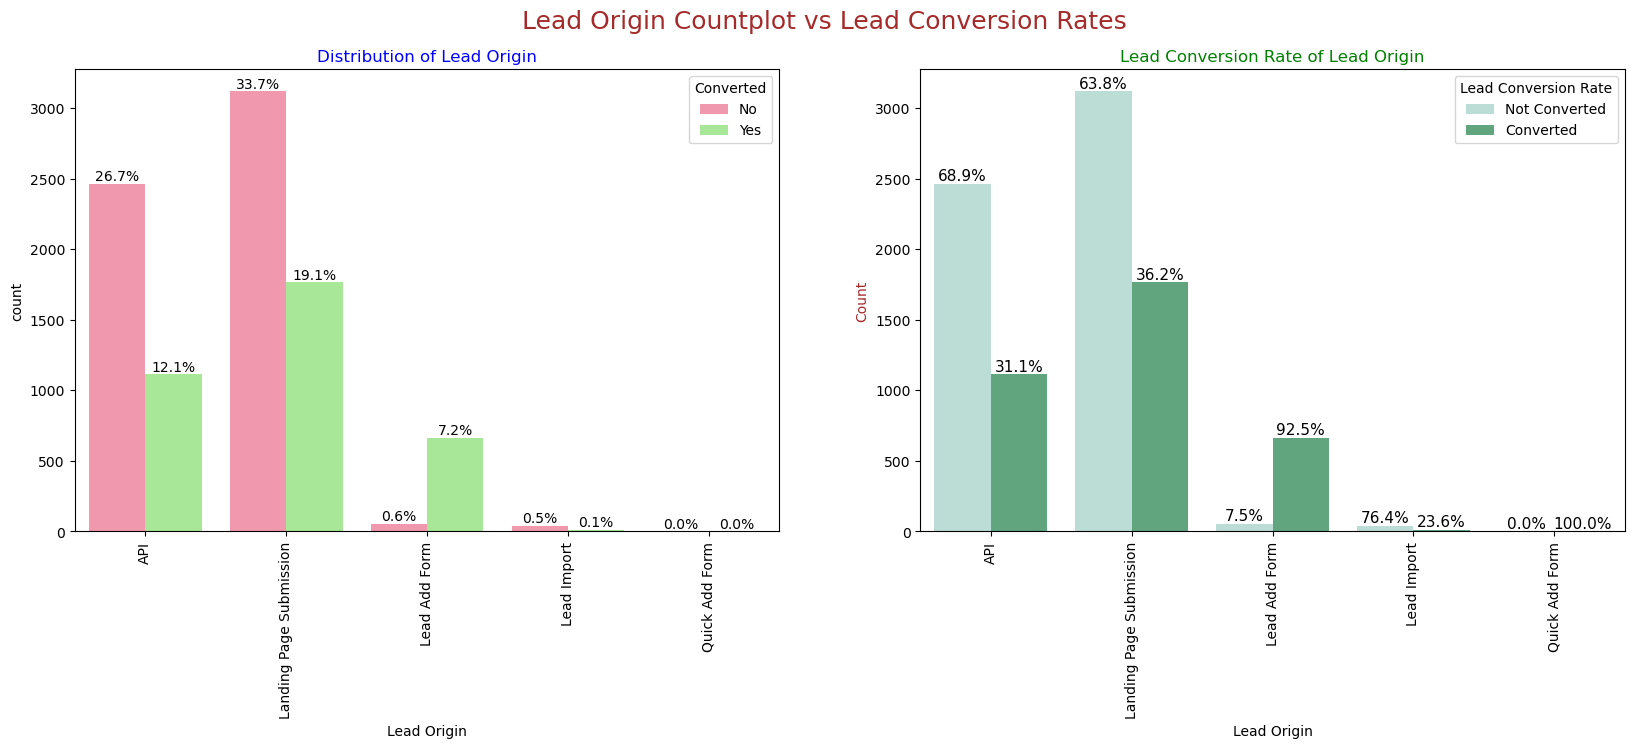

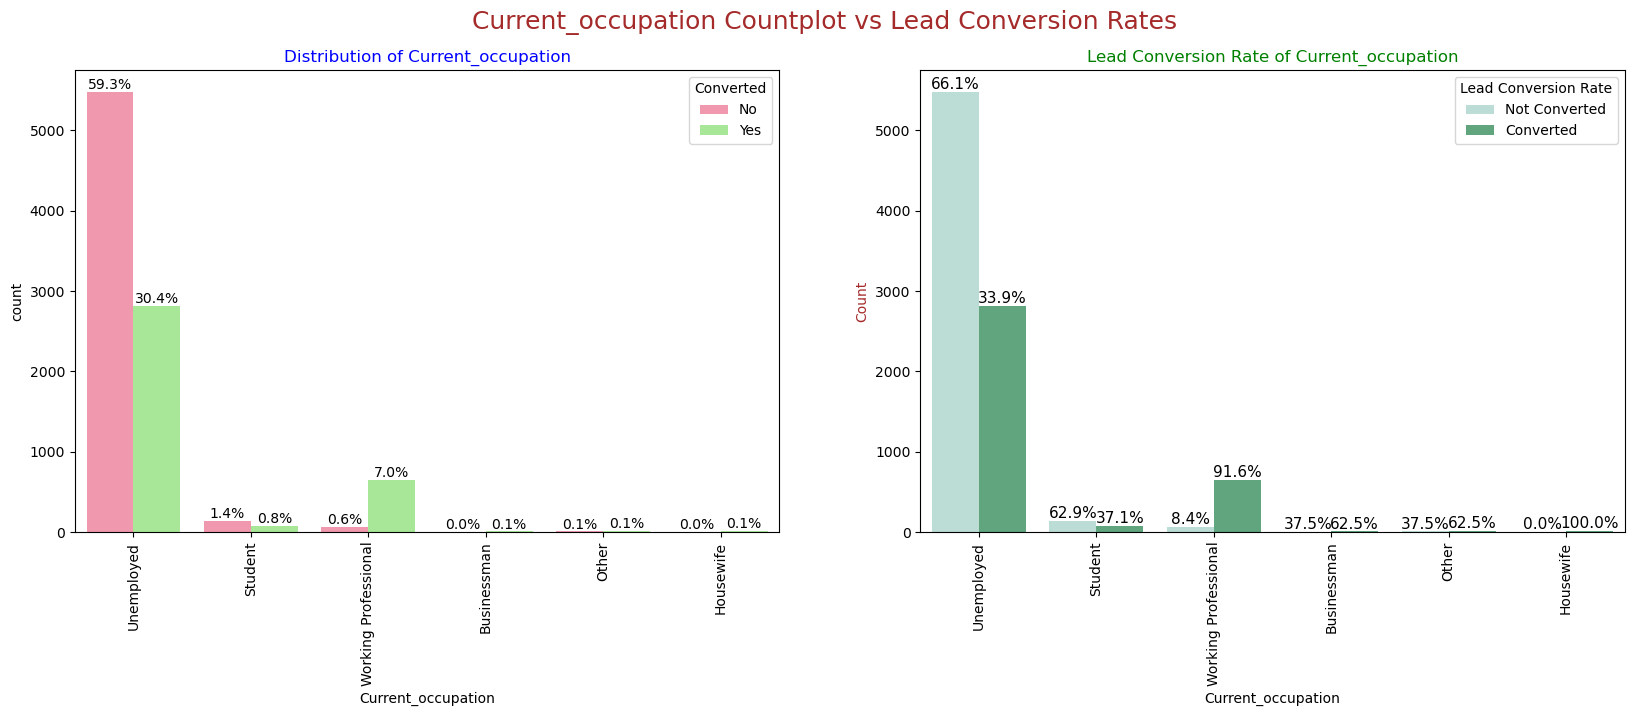

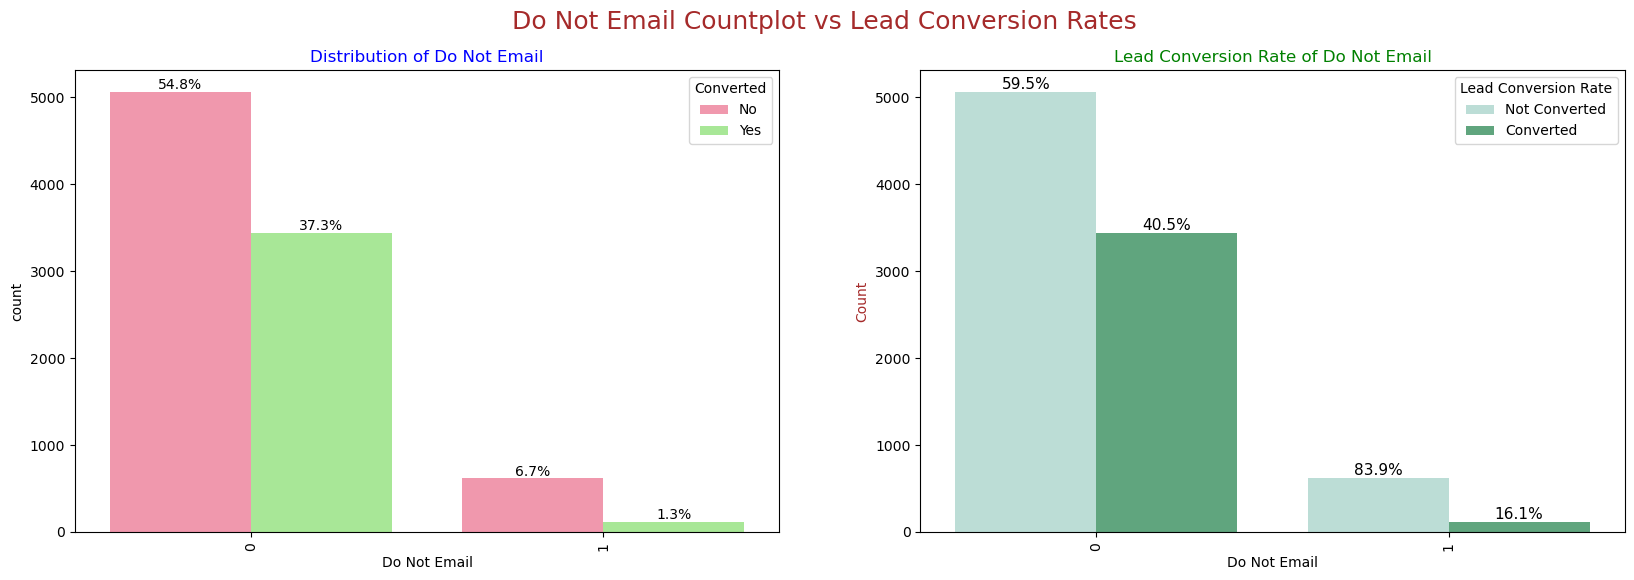

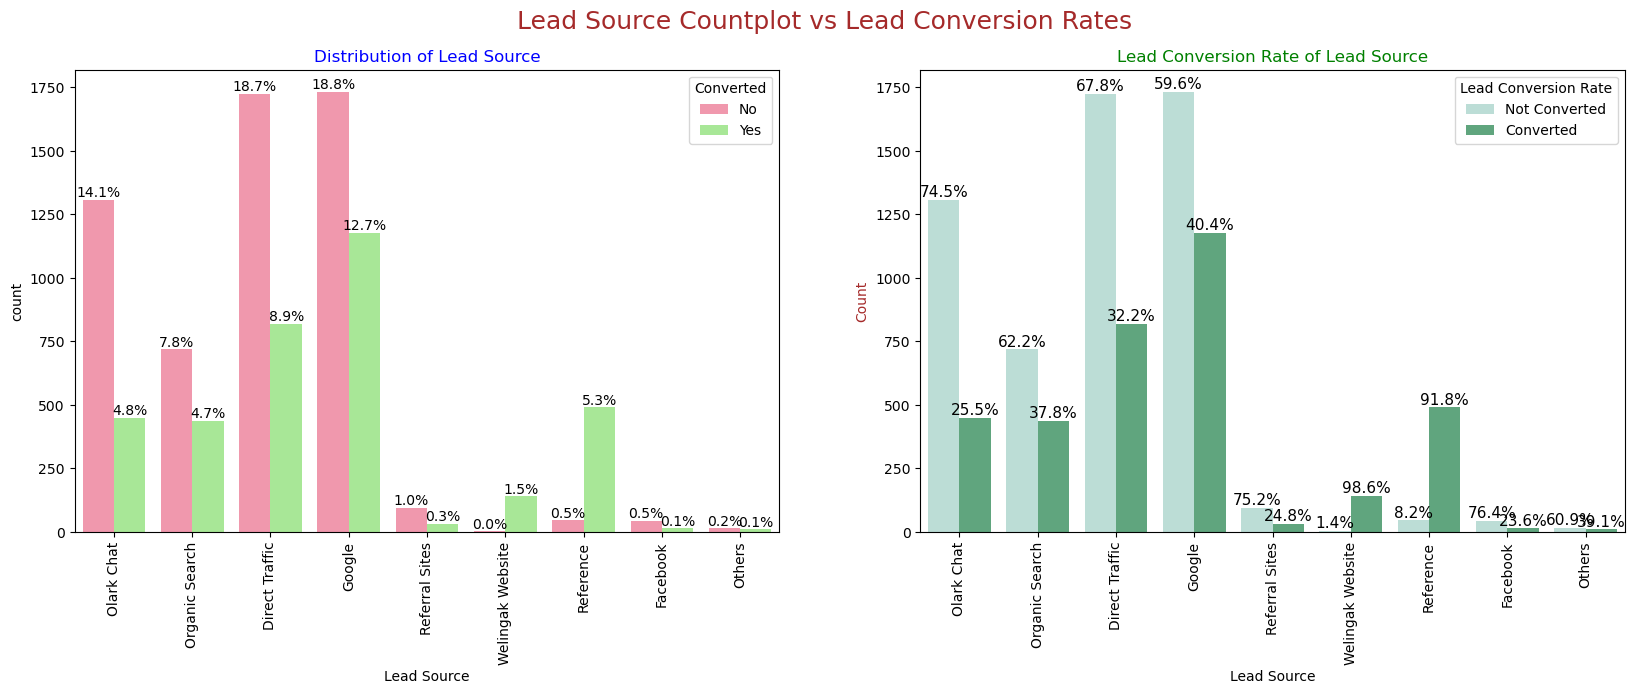

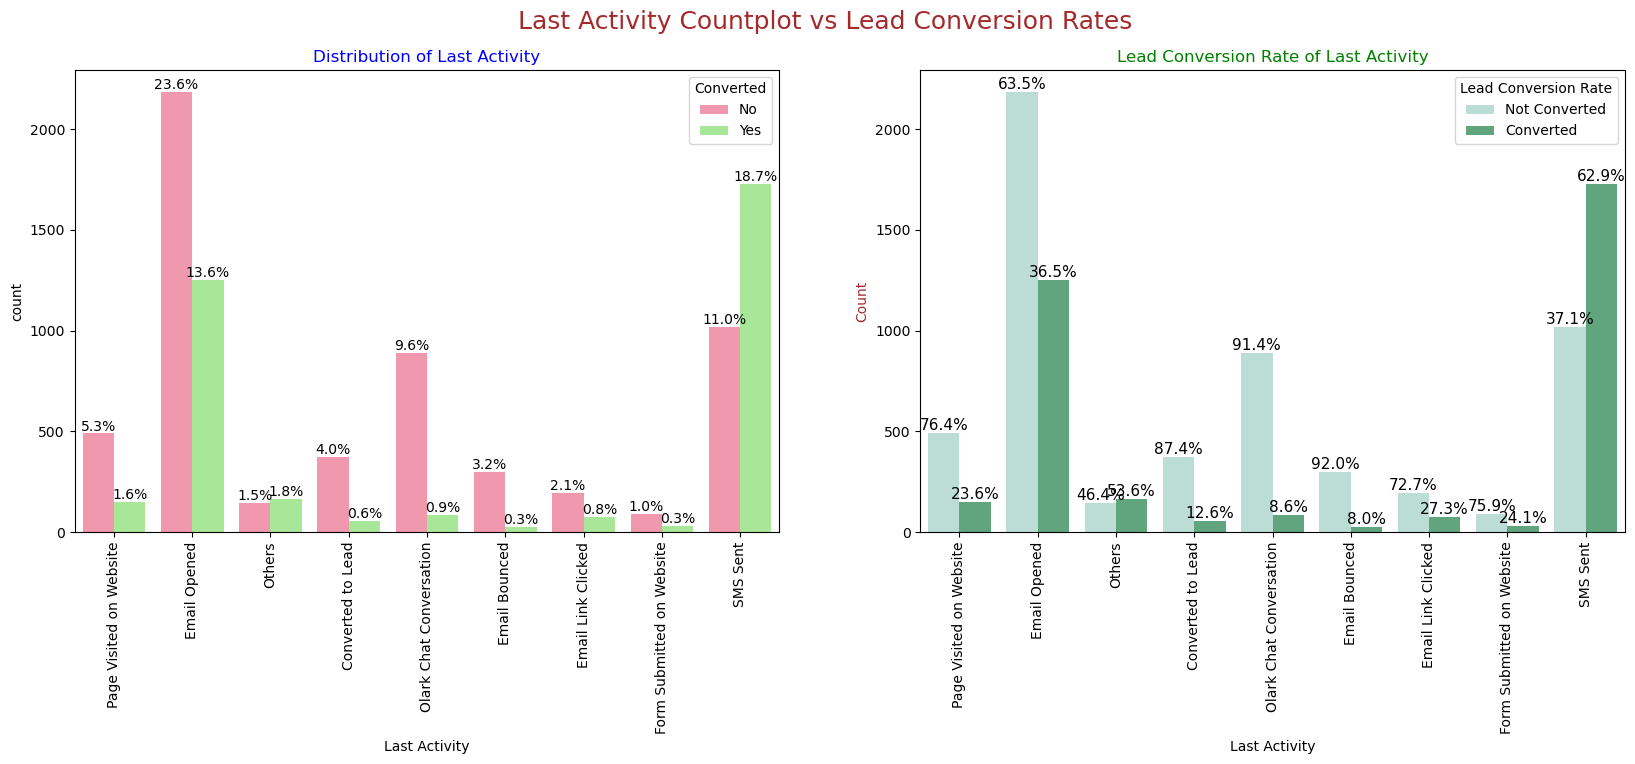

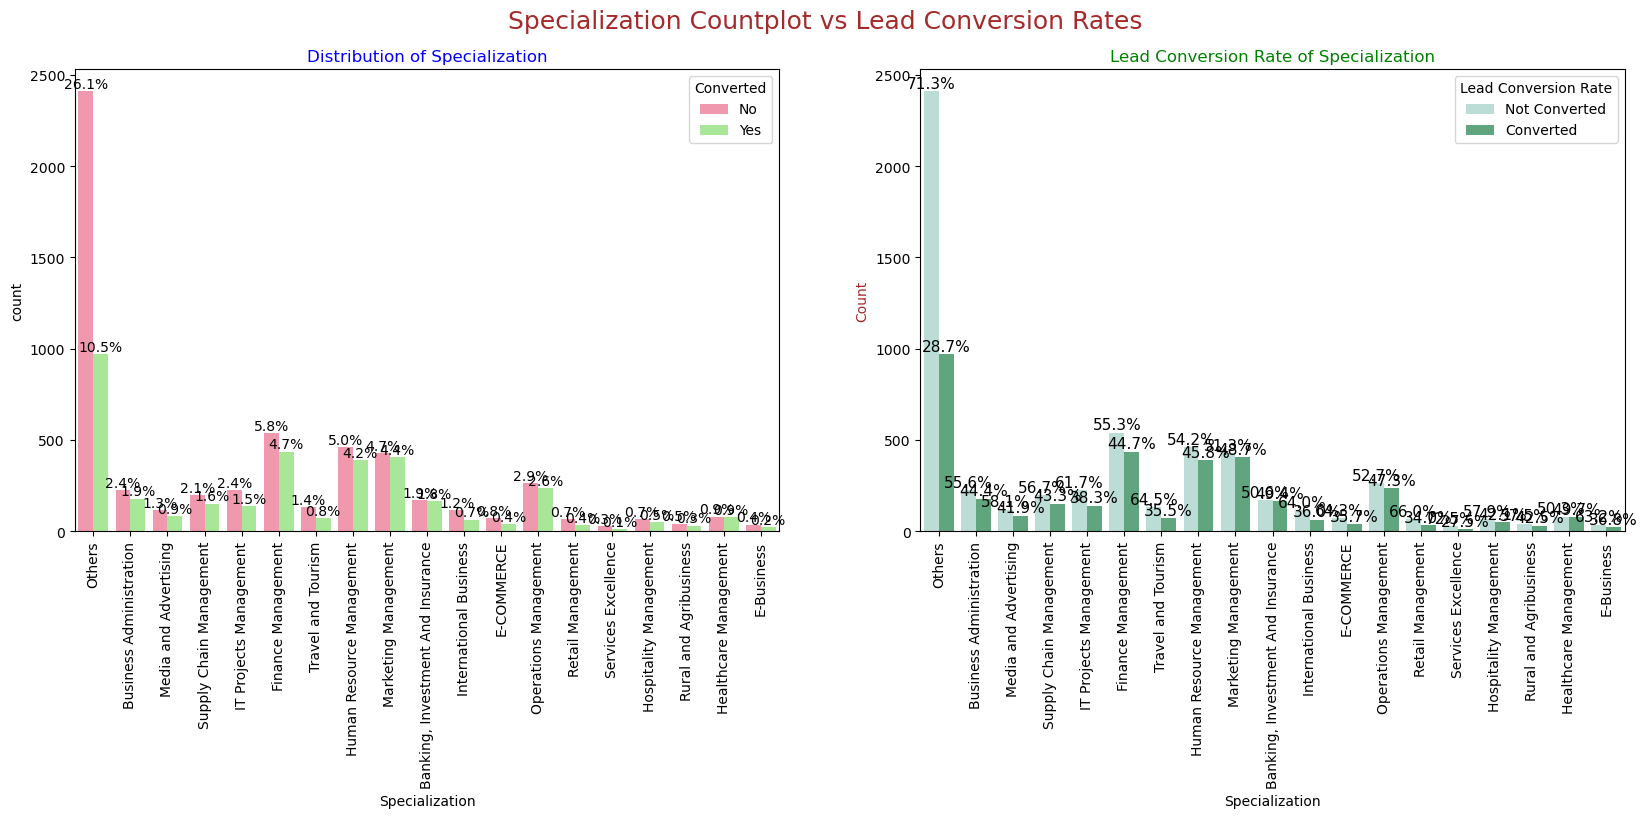

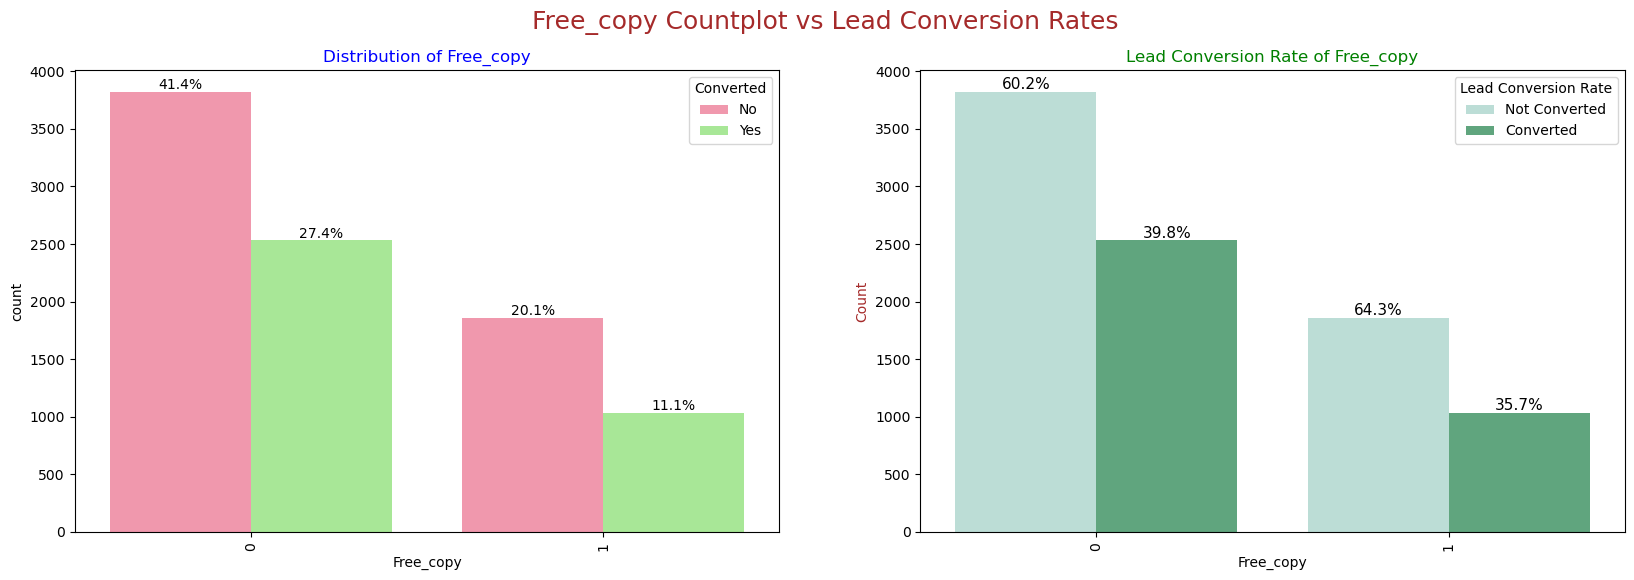

In [124]:
cat_cols = ["Lead Origin","Current_occupation","Do Not Email",
            "Lead Source","Last Activity","Specialization","Free_copy"]

for i in cat_cols:
    Bivariate_cat(leads,variable_name=i)

<strong><span>Analysis:</span></strong>

<strong><span>Origin of the Lead:</span></strong> More than half of the leads, precisely 52%, are generated through "Landing Page Submission", boasting a lead conversion rate (LCR) of 36%. The "API" channel is also significant, accounting for nearly 39% of the leads with a slightly lower LCR of 31%.

<strong><span>Occupational Background:</span></strong> A substantial 90% of the leads are individuals who are currently unemployed, and they have an LCR of 34%. In contrast, Working Professionals, though making up just 7.6% of the leads, have a remarkably high LCR of 92%.

<strong><span>Email Preferences:</span></strong> A large majority, about 92%, prefer not to receive emails regarding the course offerings.

<strong><span>Remark:</span></strong> In this analysis, the acronym LCR stands for Lead Conversion Rate.

<hr/>
<strong><span>Source of the Lead:</span></strong> The Google platform, responsible for identifying 31% of the customers, achieves an LCR of 40%. Direct Traffic is not far behind, contributing 27% of the customers with an LCR of 32%, slightly lagging behind Google. Although Organic Search only attracts 12.5% of customers, it manages a commendable LCR of 37.8%. Notably, the Reference channel, despite its lower customer attraction of about 6%, impresses with a high LCR of 91%.

<strong><span>Recent Interactions:</span></strong> The 'SMS Sent' method stands out with a significant LCR of 63%, accounting for 30% of the recent interactions with potential customers. Meanwhile, the 'Email Opened' method, which represents 38% of recent customer activities, achieves a decent LCR of 37%.

<strong><span>Field of Specialization:</span></strong> Fields such as Marketing Management, HR Management, and Finance Management are noteworthy contributors in terms of lead specialization.

#### 4.4 - Bivariate Analysis Numeric Values

c:\Users\Ana\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x400 with 0 Axes>

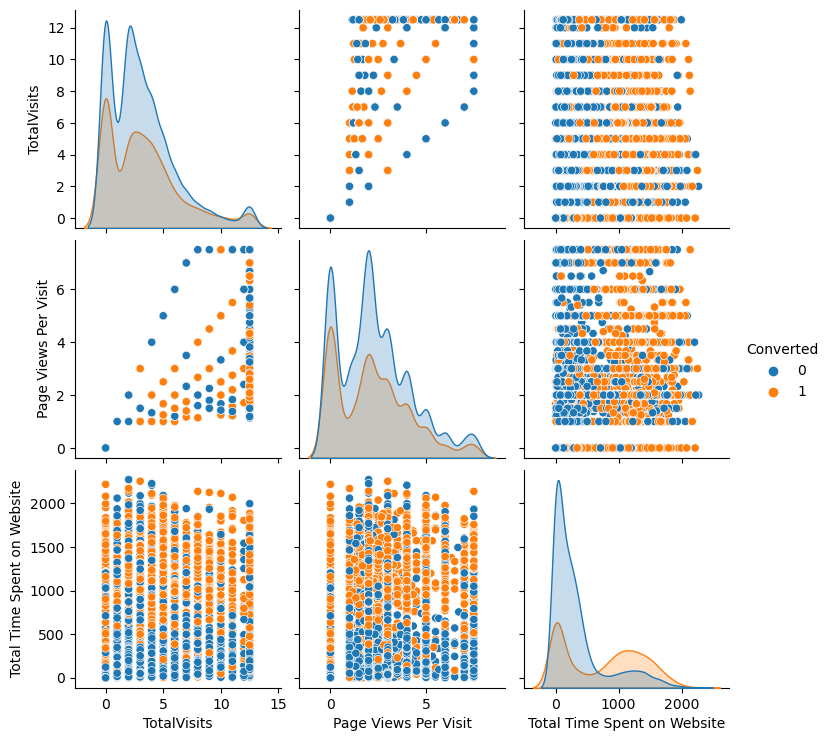

In [125]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=leads,vars=num_cols,hue="Converted")                                  
plt.show()

In [126]:
num_cols =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

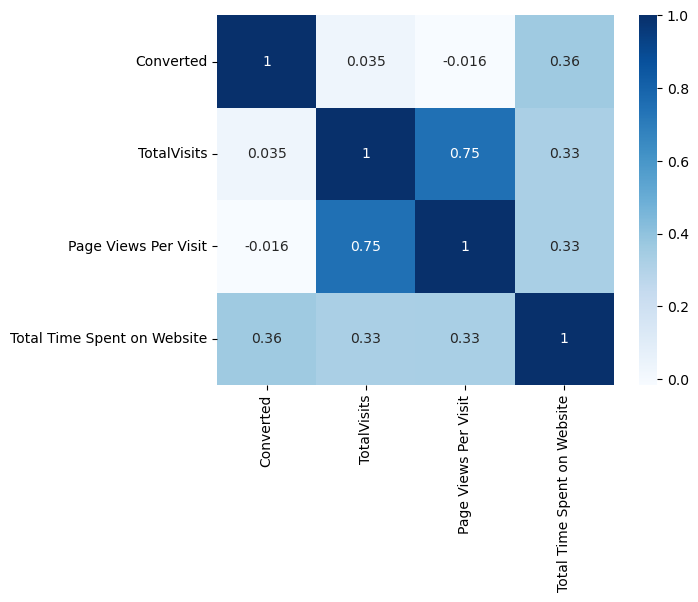

In [127]:
# Heatmap to show correlation between numerical variables
sns.heatmap(data=leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

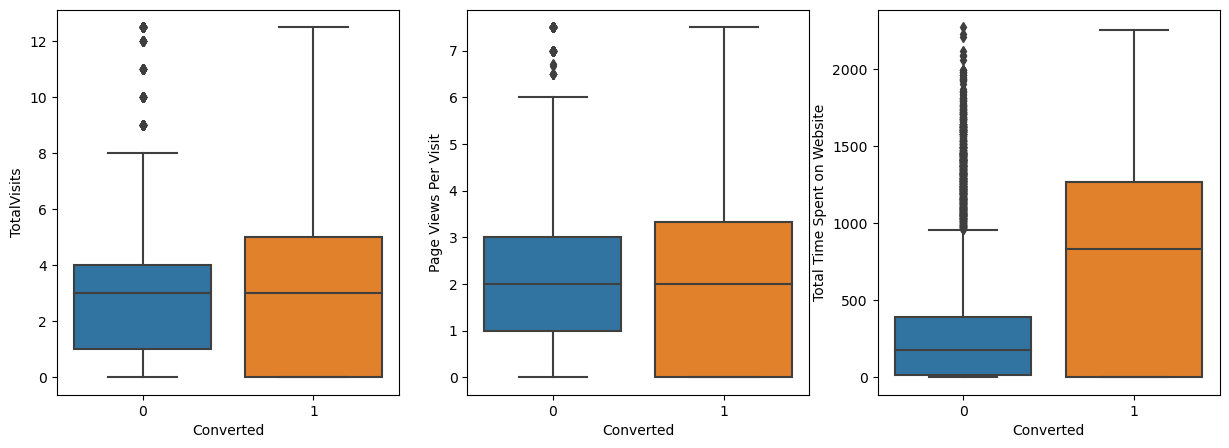

In [128]:
# Boxplot with Converted as hue
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

<strong><span>Insights:</span></strong> 
Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

## 5- Dummies 

In [129]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,City,Free_copy
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,NaN,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,NaN,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Mumbai,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0


In [130]:
# drop city column
leads = leads.drop(["City"],axis=1)

In [132]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"]], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [133]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Current_occupation,Free_copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_occupation_Housewife,Current_occupation_Other,Current_occupation_Student,Current_occupation_Unemployed,Current_occupation_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False


In [134]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current_occupation"],axis=1)

In [135]:
leads.shape
print("Number of rows:", leads.shape[0])
print("Number of columns:", leads.shape[1])

Number of rows: 9240
Number of columns: 49


In [136]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Free_copy                                 9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   bool   
 7   Lead Origin_Lead Add Form                 9240 non-null   bool   
 8   Lead Origin_Lead Import                   9240 non-null   bool   
 9   Lead Origin_Quick Add Form                9240 non-null   bool   
 10  Lead Source_Facebook                

In [137]:
#save in a csv the cleaned dataset
leads.to_pickle("leads-clean.pkl")